<a href="https://colab.research.google.com/github/abhihandique2002/ML/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
from sklearn import linear_model
from tensorflow.keras import datasets,layers,models


In [3]:
(x_train,y_train), (x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[8]

'ship'

In [5]:
x_train.shape
y_train.shape







(50000, 1)

In [6]:
y_train=y_train.reshape(-1,)
y_train[9]


3

In [7]:
def plotshow(x,y,index):
 plt.figure(figsize=(15,2))
 plt.imshow(x[index])
 plt.xlabel(classes[y[index]])


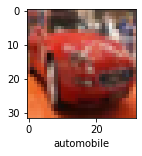

In [8]:
plotshow(x_train,y_train,5)

In [9]:
x_train/255
x_test/255

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [10]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=68,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [11]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8803 - accuracy: 0.6927
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8334 - accuracy: 0.7101
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7925 - accuracy: 0.7223
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7542 - accuracy: 0.7364
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7211 - accuracy: 0.7484
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6974 - accuracy: 0.7578
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6752 - accuracy: 0.7634
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6505 - accuracy: 0.7738
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6314 - accuracy: 0.7804
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.611

In [14]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3529 - accuracy: 0.6380


[1.3528854846954346, 0.6380000114440918]